<a href="https://colab.research.google.com/github/anupstar100/Employee-Salaries/blob/main/Employee_Salary_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Salary Project

### **Problem Statement**
To predict the salary of employee based on the information provided in the dataset.

### **How will the company profit from this solution?**
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

### **How will the employee profit from this solution?**

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.

Dataset link: https://www.kaggle.com/datasets/pavanelisetty/salarypredictions
### **Dataset Desciption**

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the data
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Employee Salary/train_dataset.csv')
train_data_salary = pd.read_csv('/content/drive/MyDrive/Datasets/Employee Salary/train_salaries.csv')

In [4]:
# glimpses of our data
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_data_salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
# combining train_data and train_data_salary and making a df
df = pd.merge(train_data, train_data_salary, how = 'inner', on = 'jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## Data Information

In [7]:
df.shape

(1000000, 9)

* There are 1000000 rows and 9 columns...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [9]:
# nulls
df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

* There are no null values.

In [10]:
# num of uniques
df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

* JobId has 1000000 unique values... Better to drop it...

## Data Cleaning

In [11]:
# dropping JobId column as it has only unique values
del df['jobId']

# EDA

Text(0.5, 1.0, 'Count of unique job types')

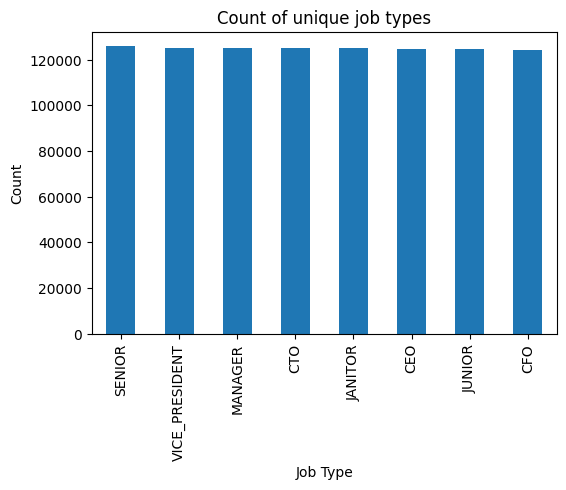

In [12]:
df['jobType'].value_counts().plot(kind = 'bar')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Count of unique job types')

In [13]:
df['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

* The count of different types of jobs are almost equal.

[]

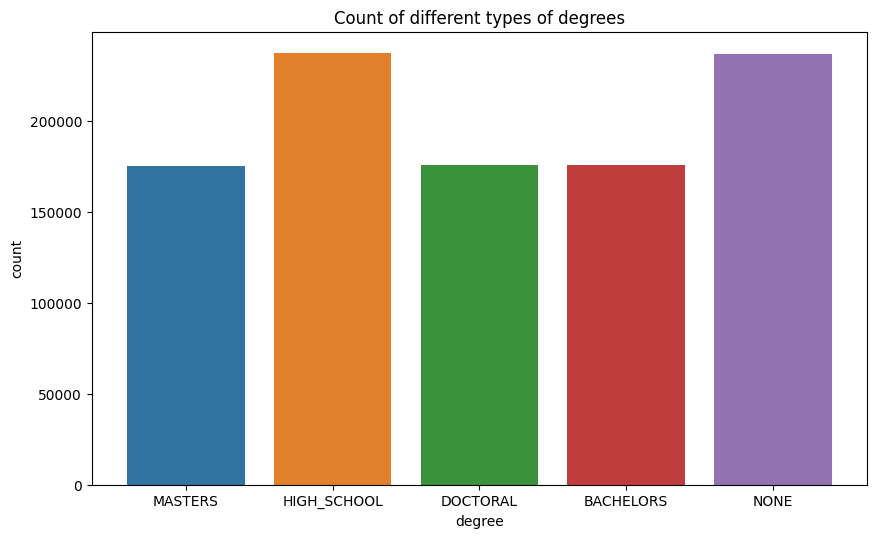

In [14]:
# countplot of degree
plt.figure(figsize = (10, 6))
sns.countplot(df['degree'])
plt.title('Count of different types of degrees')
plt.plot()

In [15]:
df['degree'].value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

* High schoolers and the employees with no degree are same.
* Count of high schoolers are max followed by employees without any degree.

In [16]:
# data with just high school
high_school_df = df[df['degree'] == 'HIGH_SCHOOL']
high_school_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
8,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
10,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102
28,COMP11,JANITOR,HIGH_SCHOOL,NONE,FINANCE,20,23,101
38,COMP31,VICE_PRESIDENT,HIGH_SCHOOL,NONE,OIL,8,6,114


[]

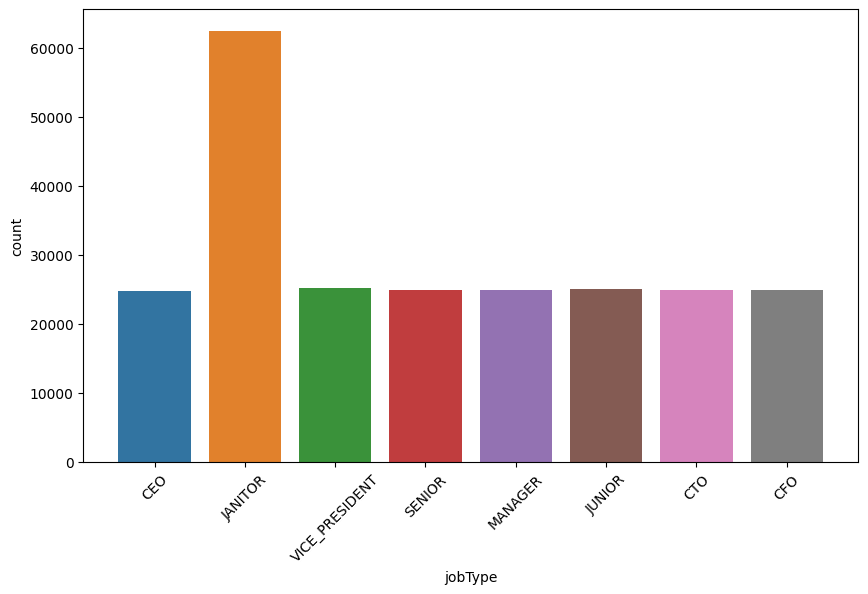

In [17]:
# plotting count different types of jobs in high_school_df
plt.figure(figsize = (10, 6))
sns.countplot(high_school_df['jobType'])
plt.xticks(rotation = 45)
plt.plot()

In [18]:
high_school_df['jobType'].value_counts()

JANITOR           62427
VICE_PRESIDENT    25201
JUNIOR            25080
CFO               24912
MANAGER           24895
CTO               24894
SENIOR            24846
CEO               24721
Name: jobType, dtype: int64

* Most of the high schoolers are working as janitors (62427).
* There are some CEOs who have done just high school (24721).

In [19]:
print('Avg salary of employees with high school:', round(high_school_df['salary'].mean(), 3))
print('Max salary of high school employees:', high_school_df['salary'].max())
print('Min salary of high school employees:', high_school_df['salary'].min())

Avg salary of employees with high school: 101.921
Max salary of high school employees: 260
Min salary of high school employees: 0


* There are some high school employess with 0 salary. They may be unpaid interns.

In [20]:
# high school employees with highest salary
high_school_df[high_school_df['salary'] == high_school_df['salary'].max()]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
457699,COMP19,CEO,HIGH_SCHOOL,NONE,OIL,21,5,260


* The high school employee with maximum salary is a CEO of COMP19 in the OIL industry.
* He has 21 years of experience and he stays 5 miles from metropolitan city.

In [21]:
# high school employees with least salary
high_school_df[high_school_df['salary'] == high_school_df['salary'].min()]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
652076,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0


* The high school employee with minimum salary (0) is a CTO (Chief Technology Officer) in COMP25 in the AUTO industry.
* He has 6 years of experience and he stays 60 miles from metropolitan city.

In [22]:
# employees without any degree
no_degree_df = df[df['degree'] == 'NONE']
no_degree_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
6,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
12,COMP4,JUNIOR,NONE,NONE,OIL,8,29,79
14,COMP57,JANITOR,NONE,NONE,AUTO,21,81,47
20,COMP44,JANITOR,NONE,NONE,SERVICE,11,96,32
21,COMP20,JUNIOR,NONE,NONE,AUTO,14,62,68


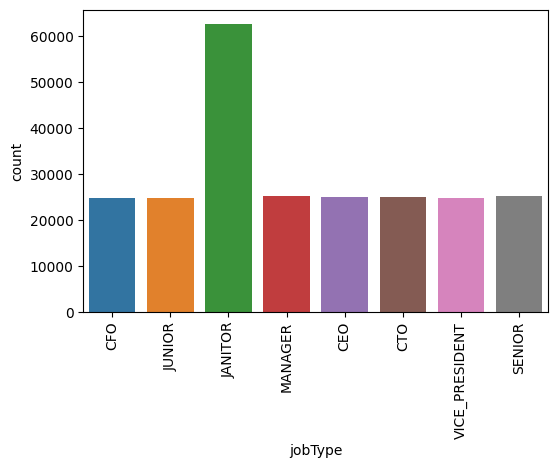

In [23]:
# count of different types of jobs without any degree
sns.countplot(no_degree_df['jobType'])
plt.xticks(rotation = 90)
plt.show()

* Most of the employees without degree are working as Janitors.
* There are some CEOs who doesn't have any degree.

In [24]:
print('Avg Salary of employees without any degree:', round(no_degree_df['salary'].mean(), 3))
print('Maximum Salary of employees without any degree:', no_degree_df['salary'].max())
print('Minimum Salary of employees without any degree:', no_degree_df['salary'].min())

Avg Salary of employees without any degree: 98.176
Maximum Salary of employees without any degree: 254
Minimum Salary of employees without any degree: 0


In [25]:
# highest salary of the employee without any degree
no_degree_df[no_degree_df['salary'] == no_degree_df['salary'].max()]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
477006,COMP59,CEO,NONE,NONE,FINANCE,24,7,254


* Maximum salary is given to a CEO (who doesn't have any degree) who works for COMP59 in the FINANCE industry.
* He has 24 years of experience and he stays 7 miles away from metropolitan city.

In [26]:
# lowest salary of the employee without any degree
no_degree_df[no_degree_df['salary'] == no_degree_df['salary'].min()]

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
495984,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0


* Minimum salary is given to a JUNIOR (having no degree) who works for COMP34 in the OIL industry.
* He has just 1 years of experience and he stays 25 miles away from the metropolitan city.
* The salary is 0.

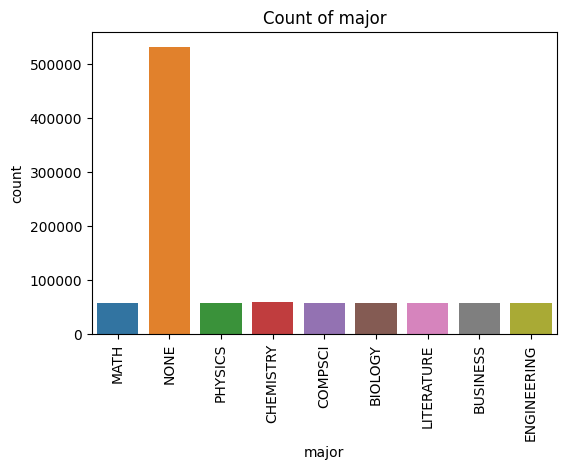

In [28]:
# countplot of major
sns.countplot(df['major'])
plt.xticks(rotation = 90)
plt.title('Count of major')
plt.show()

In [30]:
(df['major'].value_counts() * 100) / len(df)

NONE           53.2355
CHEMISTRY       5.8875
LITERATURE      5.8684
ENGINEERING     5.8596
BUSINESS        5.8518
PHYSICS         5.8410
COMPSCI         5.8382
BIOLOGY         5.8379
MATH            5.7801
Name: major, dtype: float64

* Most of the employees doesn't have any major in their degree (532355 or 53%).

In [31]:
# creating a subset of our df where major == 'NONE'
no_major_df = df[df['major'] == 'NONE']
no_major_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
6,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
8,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
10,COMP56,JANITOR,HIGH_SCHOOL,NONE,HEALTH,24,30,102
12,COMP4,JUNIOR,NONE,NONE,OIL,8,29,79


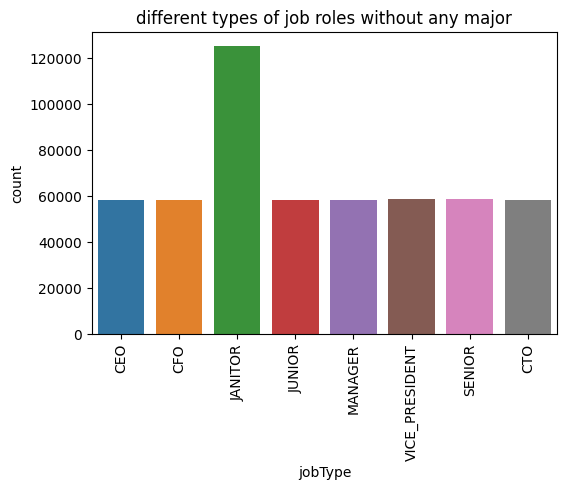

JANITOR           12.4971
VICE_PRESIDENT     5.8463
SENIOR             5.8378
MANAGER            5.8288
CTO                5.8161
JUNIOR             5.8128
CEO                5.8024
CFO                5.7942
Name: jobType, dtype: float64


In [34]:
# different types of job roles without any major
sns.countplot(no_major_df['jobType'])
plt.xticks(rotation = 90)
plt.title('different types of job roles without any major')
plt.show()

print((no_major_df['jobType'].value_counts() * 100) / len(df))

* Most of the employees, who doesn't have any major, are working as JANITOR (12.5% of our total df).

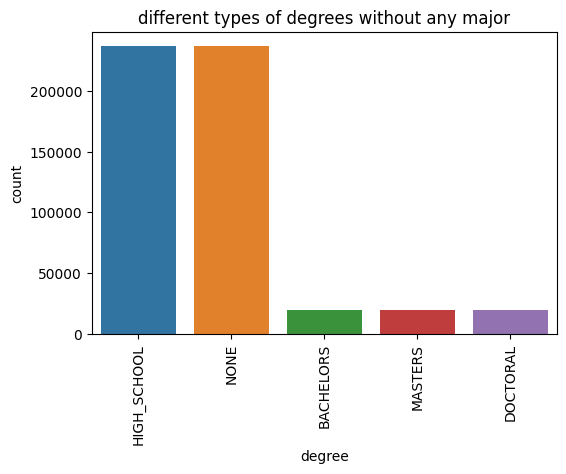



************************* 

HIGH_SCHOOL    23.6976
NONE           23.6854
DOCTORAL        1.9719
BACHELORS       1.9498
MASTERS         1.9308
Name: degree, dtype: float64


In [37]:
# different types of degrees without any major
sns.countplot(no_major_df['degree'])
plt.xticks(rotation = 90)
plt.title('different types of degrees without any major')
plt.show()

print('\n')
print('*' * 25, '\n')
print((no_major_df['degree'].value_counts() * 100) / len(df))

* Most of the employees, who doesn't have any degree or just have a high school degree, don't have any major (almost 23.7% of our df).